In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sciann as sn

---------------------- SCIANN 0.6.7.3 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://www.sciencedirect.com/science/article/pii/S0045782520307374", 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 

 Need support or would like to contribute, please join sciann`s slack group: 
 +  "https://join.slack.com/t/sciann/shared_invite/zt-ne1f5jlx-k_dY8RGo3ZreDXwz0f~CeA" 
 
TensorFlow Version: 2.8.0 
Python Version: 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)] 



In [9]:
Nx=5
time=5
x_data=np.linspace(0,1,Nx)
time_data=np.linspace(0,time,time)
[X_data,t_data]=np.meshgrid(x_data,time_data)

In [10]:
print(t_data)

[[0.   0.   0.   0.   0.  ]
 [1.25 1.25 1.25 1.25 1.25]
 [2.5  2.5  2.5  2.5  2.5 ]
 [3.75 3.75 3.75 3.75 3.75]
 [5.   5.   5.   5.   5.  ]]


In [11]:
print(X_data)

[[0.   0.25 0.5  0.75 1.  ]
 [0.   0.25 0.5  0.75 1.  ]
 [0.   0.25 0.5  0.75 1.  ]
 [0.   0.25 0.5  0.75 1.  ]
 [0.   0.25 0.5  0.75 1.  ]]


In [55]:
##Number of lattice nodes
Nx=25
##time 
time=50
##meshing
x_data=np.linspace(0,1,Nx)
time_data=np.linspace(0,time,time)
[X_data,t_data]=np.meshgrid(x_data,time_data)
##Macroscopic property
T_data=np.zeros((time,Nx))
f1eq=np.zeros((time,Nx))
f2eq=np.zeros((time,Nx))
##Temperatyre at left boundary
Tl=1
T_data[:,0]=Tl
##Temperature at right boundary
Tr=0
T_data[:,Nx-1]=Tr
##weights of digital particles
w1=1/2
w2=1/2
omega=1.5
tau=1/omega
##particle velocity distribution function
f1=np.zeros((Nx))
f2=np.zeros((Nx))
##post collision vdf
f1c=np.zeros((Nx))
f2c=np.zeros((Nx))
##Compute equilibrium vdf
f1eq=w1*T_data[0,:]
f2eq=w2*T_data[0,:]
##Initiliazation 
f1=f1eq
f2=f2eq
##collision at lattice nodes
for i in np.arange(1,Nx-1):
    f1c[i]=f1[i]+omega*(f1eq[i]-f1[i])
    f2c[i]=f2[i]+omega*(f2eq[i]-f2[i])
##Boundary lattice nodes
f1c[0]=f1[0]
f2c[0]=f2[0]
f1c[Nx-1]=f1[Nx-1]
f2c[Nx-1]=f2[Nx-1]
##Streaming of digital particles
for i in np.arange(0,Nx-1):
    f1[i+1]=f1c[i]

for i in np.arange(0,Nx-1):
    f2[i]=f2c[i+1]

##Boundary conditions
##right boundary 
f2[0]=Tr-f1[0]
##left boundary
f1[Nx-1]=Tl-f2[Nx-1]
##Macroscopic property
for i in np.arange(1,Nx-1):
    T_data[0,i]=f1[i]+f2[i]
   
print(T_data[0,:])
# # ##iterating till required duration
iter=1
while(iter<time):
    ##Compute equilibrium vdf
    for i in np.arange(0,Nx-1):
        f1eq[i]=w1*T_data[iter-1,i]
        f2eq[i]=w2*T_data[iter-1,i]
    ##collision at lattice nodes
    for i in np.arange(1,Nx-1):
        f1c[i]=f1[i]+omega*(f1eq[i]-f1[i])
        f2c[i]=f2[i]+omega*(f2eq[i]-f2[i])
    ##Boundary lattice nodes
    f1c[0]=f1[0]
    f2c[0]=f2[0]
    f1c[Nx-1]=f1[Nx-1]
    f2c[Nx-1]=f2[Nx-1]
    ##Streaming of digital particles
    for i in np.arange(0,Nx-1):
        f1[i+1]=f1c[i]

    for i in np.arange(0,Nx-1):
        f2[i]=f2c[i+1]


    ##Boundary conditions
    ##right boundary 
    f2[0]=Tr-f1[0]
    ##left boundary
    f1[Nx-1]=Tl-f2[Nx-1]

    ##Macroscopic property
    for i in np.arange(1,Nx-1):
        T_data[iter,i]=f1[i]+f2[i]
        
    iter=iter+1   


[1.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0. ]


In [49]:
print(T_data)

[[1.00000000e+00 5.00000000e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 5.00000000e-01 2.50000000e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.000

In [56]:
T_data[2,:]

array([1.   , 0.625, 0.25 , 0.125, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ])

In [45]:
T_data[1,:]

array([1.  , 0.5 , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [37]:
print(np.shape(T_data))

(6, 5)


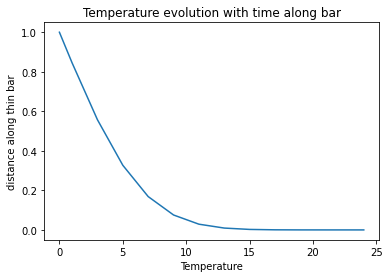

In [58]:
plt.plot(T_data[25,:])
plt.xlabel('Temperature')
plt.ylabel('distance along thin bar')
plt.title('Temperature evolution with time along bar')
plt.show()

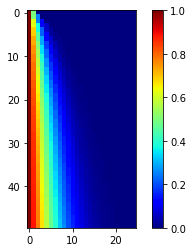

In [59]:
plt.imshow(T_data,cmap='jet')
plt.colorbar()
plt.show()

In [66]:
print(np.shape(time_data))

(10, 11)


In [67]:
print(np.shape(time_data))

(10, 11)


In [60]:
##Neural network
x=sn.Variable('x')
t=sn.Variable('t')
T_neural=sn.Functional('T_neural',[x,t],[40,40,40,40],'tanh')

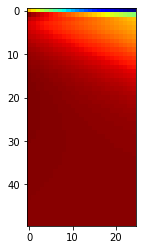

In [61]:
##Evaluate
T_pred=T_neural.eval([X_data,t_data])
# im=plt.pcolor(x_data,y_data,f_pred,cmap='seismic')
# plt.colorbar(im)
plt.imshow(T_pred,cmap='jet')
plt.show()

In [62]:
##optimizer
m=sn.SciModel([x,t],T_neural,loss_func='mse',optimizer='adam')

In [63]:
##Training
h=m.train([X_data,t_data],T_data,epochs=500,learning_rate=0.005)


Total samples: 1250 
Batch size: 64 
Total batches: 20 

Epoch 1/500
20/20 [==============================] - 1s 8ms/step - batch: 9.5000 - size: 62.5000 - loss: 0.3887 - lr: 0.0050 - time: 0.9471
Epoch 2/500
20/20 [==============================] - 0s 5ms/step - batch: 9.5000 - size: 62.5000 - loss: 0.1030 - lr: 0.0050 - time: 0.1256
Epoch 3/500
20/20 [==============================] - 0s 5ms/step - batch: 9.5000 - size: 62.5000 - loss: 0.0811 - lr: 0.0050 - time: 0.1704
Epoch 4/500
20/20 [==============================] - 0s 5ms/step - batch: 9.5000 - size: 62.5000 - loss: 0.0754 - lr: 0.0050 - time: 0.1585
Epoch 5/500
20/20 [==============================] - 0s 10ms/step - batch: 9.5000 - size: 62.5000 - loss: 0.0670 - lr: 0.0050 - time: 0.2804
Epoch 6/500
20/20 [==============================] - 0s 6ms/step - batch: 9.5000 - size: 62.5000 - loss: 0.0430 - lr: 0.0050 - time: 0.1860
Epoch 7/500
20/20 [==============================] - 0s 7ms/step - batch: 9.5000 - size: 62.5000 - lo

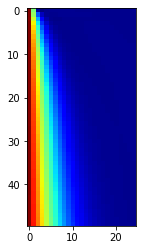

In [64]:
##Evaluate
T_pred=T_neural.eval([X_data,t_data])
# im=plt.pcolor(x_data,y_data,f_pred,cmap='seismic')
# plt.colorbar(im)
plt.imshow(T_pred,cmap='jet')
plt.show()

In [66]:
print(T_pred[5,:])

[ 1.0015278e+00  6.9819742e-01  4.3248925e-01  2.3774047e-01
  1.1075325e-01  4.1777212e-02  1.1701364e-02  1.0614581e-03
 -1.8093996e-03 -2.0342879e-03 -1.5327148e-03 -9.5168874e-04
 -4.8045442e-04 -1.5179440e-04  4.9311668e-05  1.4807656e-04
  1.6899779e-04  1.3180450e-04  5.3603202e-05 -5.3923577e-05
 -1.8034503e-04 -3.1832978e-04 -4.6209618e-04 -6.0645863e-04
 -7.4837729e-04]


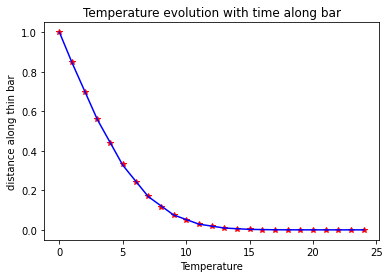

In [70]:
plt.plot(T_pred[25,:],'*r')
plt.plot(T_data[25,:],'-b')
plt.xlabel('Temperature')
plt.ylabel('distance along thin bar')
plt.title('Temperature evolution with time along bar')
plt.show()